In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle
import time

C:\Users\narah\anaconda3\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('./datasets/Heart_Disease_Prediction.csv')

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


<AxesSubplot:>

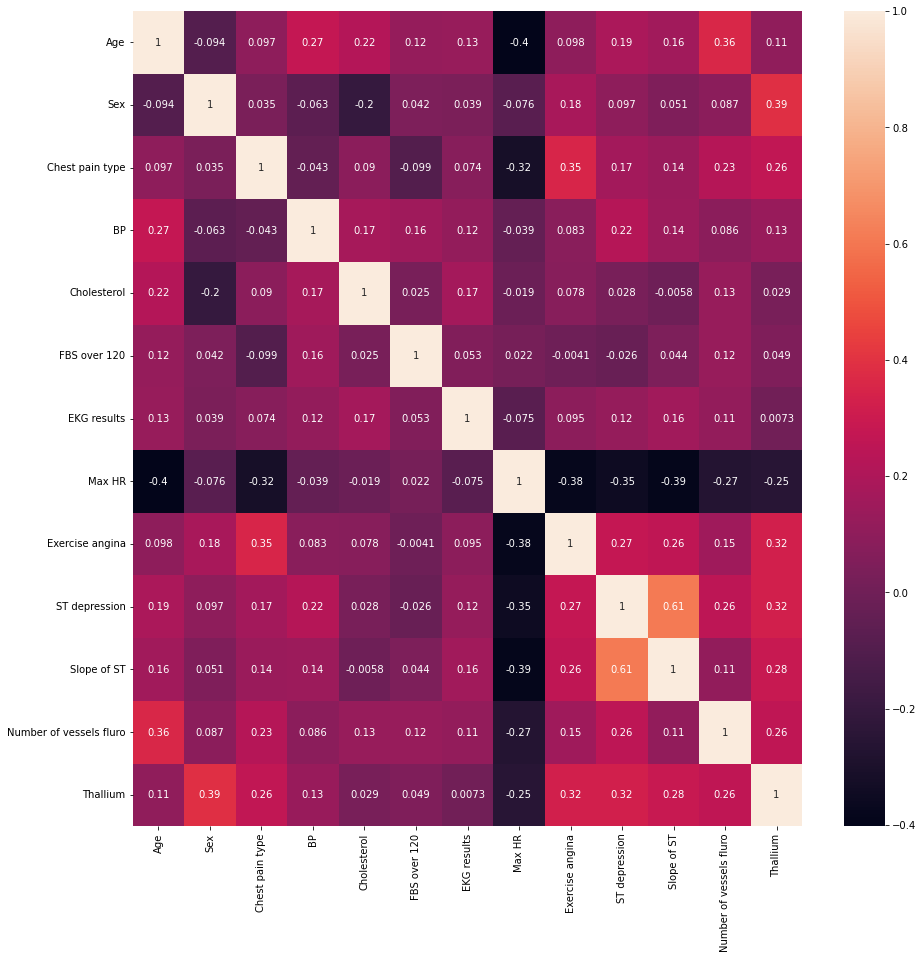

In [7]:
import seaborn as sns

corr = df.corr()

plt.figure(figsize = (15,15))
sns.heatmap(corr, annot = True)

In [8]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

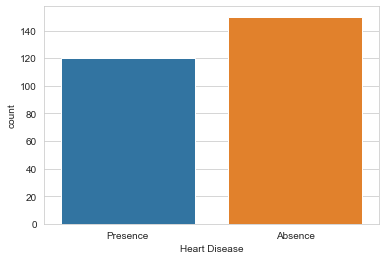

In [9]:
sns.set_style('whitegrid')
sns.countplot(x = 'Heart Disease', data = df)

In [10]:
df = df.copy()
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [11]:
cols_a = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR']
cols_b = ['Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']

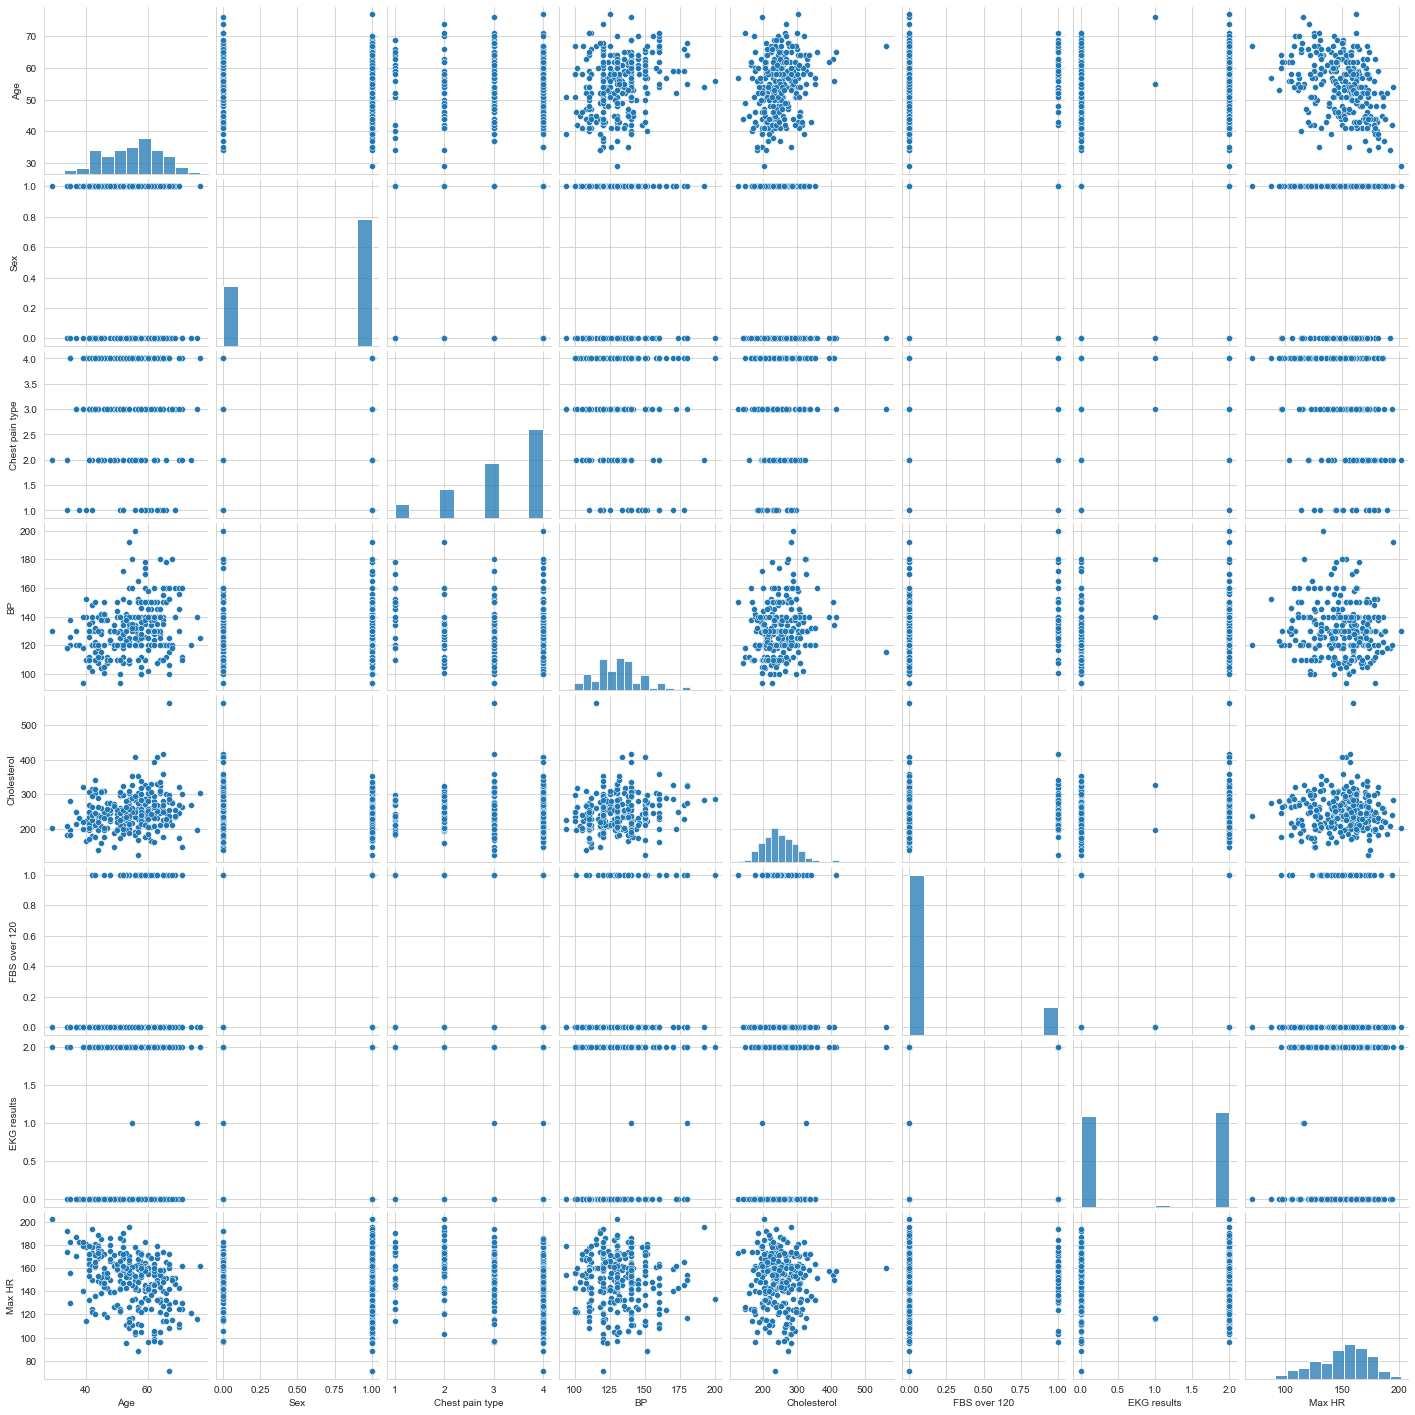

In [12]:
sns.pairplot(df[cols_a])

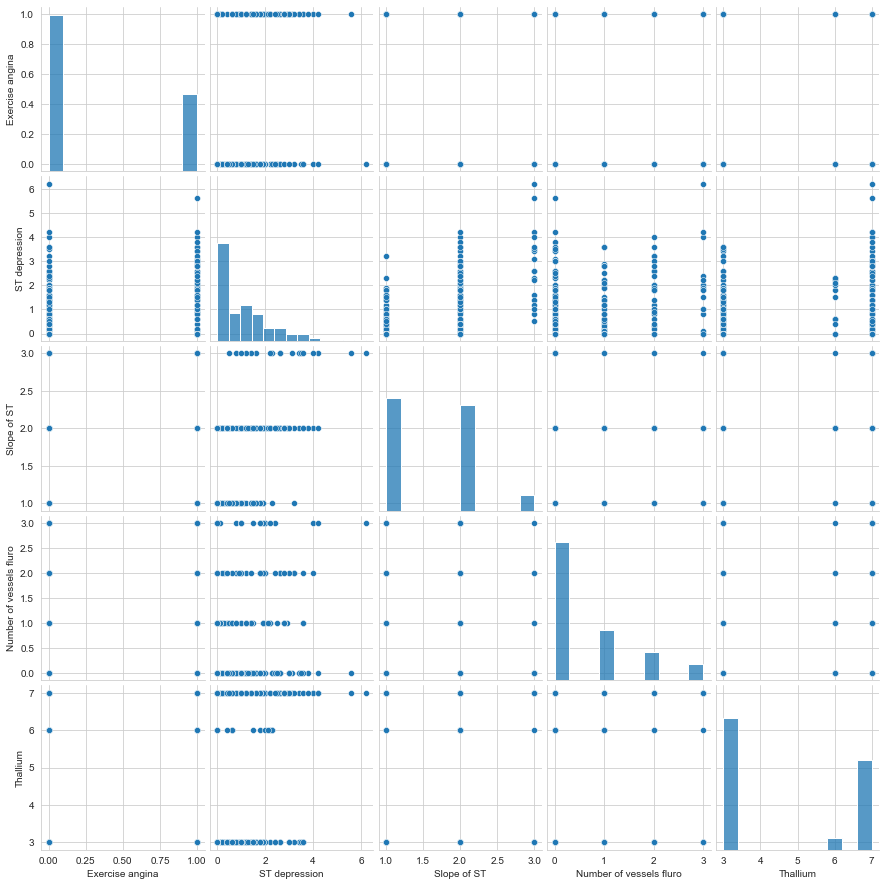

In [13]:
sns.pairplot(df[cols_b])

In [14]:
X = df.drop(['Heart Disease'], axis = 1)
y = df['Heart Disease']

In [15]:
y = np.reshape(y.values,(y.shape[0],1))

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
new_data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(new_data, columns = df.columns)

In [17]:
X.shape

(270, 13)

In [18]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

C:\Users\narah\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
y

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1])

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=100)

In [21]:
dense_layers = [4]
layer_sizes = [128]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        model = Sequential()
        model.add(Activation('relu'))
        model.add(Flatten())
        for _ in range(dense_layer):
            model.add(Dense(layer_size))
            model.add(Activation('relu'))

        model.add(Dense(1))
        model.add(Activation('sigmoid'))
        NAME = "{}-nodes-{}-dense-{}".format( layer_size, dense_layer, int(time.time()))
        tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

        model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'],
                          )
        model.fit(X_train, y_train,batch_size=5,epochs=40,validation_split = 0.3,callbacks=[tensorboard])
        
        y_pred_prob = model.predict(X_val)
        y_pred = (y_pred_prob > 0.5).astype(int)


Epoch 1/40
34/34 [==============================] - 2s 20ms/step - loss: 0.5949 - accuracy: 0.7059 - val_loss: 0.7432 - val_accuracy: 0.5890
Epoch 2/40
34/34 [==============================] - 0s 8ms/step - loss: 0.4177 - accuracy: 0.8235 - val_loss: 0.3975 - val_accuracy: 0.8219
Epoch 3/40
34/34 [==============================] - 0s 9ms/step - loss: 0.3511 - accuracy: 0.8765 - val_loss: 0.4319 - val_accuracy: 0.8356
Epoch 4/40
34/34 [==============================] - 0s 9ms/step - loss: 0.2790 - accuracy: 0.9000 - val_loss: 0.5070 - val_accuracy: 0.8082
Epoch 5/40
34/34 [==============================] - 0s 8ms/step - loss: 0.2637 - accuracy: 0.8824 - val_loss: 0.4762 - val_accuracy: 0.8082
Epoch 6/40
34/34 [==============================] - 0s 8ms/step - loss: 0.2392 - accuracy: 0.9118 - val_loss: 0.6747 - val_accuracy: 0.7397
Epoch 7/40
34/34 [==============================] - 0s 8ms/step - loss: 0.1730 - accuracy: 0.9294 - val_loss: 0.6087 - val_accuracy: 0.7808
Epoch 8/40
34/34 [=

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)

In [23]:
cm

array([[ 8,  1],
       [ 4, 14]], dtype=int64)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 activation (Activation)     (None, 13)                0         
                                                                 
 flatten (Flatten)           (None, 13)                0         
                                                                 
 dense (Dense)               (None, 128)               1792      
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               1

In [25]:
pickle.dump(model, open("./models/heart.pkl",'wb'))